# Description:

This project intends to bring attention of all the trainers and sports analysis firms who want to push the players in right direction to hone up their skills by finding the niche key information that can assist them in figuring out the best event(s) or game(s), which suits to their players’ potential. 

Countries from across the globe can seek the players and events information (from history) to see which events were their strengths, and basis that they can reinforce the strategies and change the game play to grab a chance to win a medal for themselves and their countries.


# Questions:

-	Gender difference in overall participation and if it has any effect on Olympics corresponding to participation in different seasons?
-	To find out the countries and the sports that they associate most with basis participation
-	To ditermine the consistency in the participation of the players overall in Olympics


# Hypothesis:
-	Summers games bring more traction of participation in the games
-	More participation increases with the years progression
-	Disparity between gender participations with female with quite lower participation


## Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as sql
from mysql.connector import Error
import csv

## Uploading and Cleaning the Data

In [4]:
df1 = pd.read_csv("C:\\Users\\Common Machine\\OneDrive\\Desktop\\Capstone\\athlete_events.csv")

df2 = pd.read_csv("C:\\Users\\Common Machine\\OneDrive\\Desktop\\Capstone\\noc_regions.csv")

In [5]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
#Checking the Data type of each column and looking out for null values
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0 

In [8]:
# Clearing out the Null Values (Cleaning)
ath_f = df1.fillna({
   'Age':0, 'Height':0, 'Weight':0, 'Medal':'None'
})
noc_f = df2.region.fillna(df2.notes, inplace=True)
noc_f = df2.drop('notes', axis=1)

In [9]:
ath_f.info()
noc_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0 

## Connecting and importing data to MySQL

In [10]:
try:
    conn = sql.connect(host = 'localhost', user = 'root', password = 'The28Table')
    
    if conn.is_connected():
        c = conn.cursor()
        c.execute("CREATE DATABASE SportsStats")
    
except Error as e:
    print("Error while connecting to MySQL:", e)


Error while connecting to MySQL: 1007 (HY000): Can't create database 'sportsstats'; database exists


In [11]:
try:
    conn = sql.connect(host = 'localhost', user = 'root', password = 'The28Table', database = 'sportsstats') 
    
    if conn.is_connected():
        c = conn.cursor()
        c.execute("DROP TABLE IF EXISTS AthleteEvent")
        c.execute("DROP TABLE IF EXISTS NOC_Region")
        
        c.execute('CREATE TABLE AthleteEvent(ID int, Name VARCHAR(255), Sex VARCHAR(20), Age float, Height float,\
        Weight float, Team VARCHAR(255), NOC VARCHAR(255), Games VARCHAR(255), Year int, Season VARCHAR(20),\
        City VARCHAR(255), Sport VARCHAR(255), Event VARCHAR(255), Medal VARCHAR(255))')
        c.execute('CREATE TABLE NOC_Region(NOC VARCHAR(10), Region VARCHAR(255))')
        
        for i, row in ath_f.iterrows():
            val = "INSERT INTO sportsstats.AthleteEvent VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            c.execute(val, tuple(row))
            conn.commit()
            
        for i, row in noc_f.iterrows():
            val = "INSERT INTO sportsstats.NOC_Region VALUES(%s,%s)"
            c.execute(val, tuple(row))
            conn.commit()
except Error as e:
    print("Error while connecting to MySQL:", e)        

# Data Analysis

## Gender based Analysis

In [134]:
conn = sql.connect(host = 'localhost', user = 'root', password = 'The28Table', database = 'sportsstats') 

c = conn.cursor(buffered=True)
c.execute('SELECT DISTINCT a.name, a.sex, COUNT(a.name) AS participation_count, n.region, season\
          FROM athleteevent a\
          INNER JOIN noc_region n ON a.NOC = n.NOC\
          GROUP BY name\
          ORDER BY participation_count DESC')
Result = c.fetchall()

In [144]:
Result

[('Robert Tait McKenzie', 'M', 58, 'Canada'),
 ('Heikki Ilmari Savolainen', 'M', 39, 'Finland'),
 ('Joseph "Josy" Stoffel', 'M', 38, 'Luxembourg'),
 ('Ioannis Theofilakis', 'M', 36, 'Greece'),
 ('Takashi Ono', 'M', 33, 'Japan'),
 ('Alexandros Theofilakis', 'M', 32, 'Greece'),
 ('Andreas Wecker', 'M', 32, 'Germany'),
 ('Jean Lucien Nicolas Jacoby', 'M', 32, 'Luxembourg'),
 ('Alfrd (Arnold-) Hajs (Guttmann-)', 'M', 32, 'Hungary'),
 ('Alfred August "Al" Jochim', 'M', 31, 'USA'),
 ('Johann "Hans" Sauter', 'M', 31, 'Austria'),
 ('Michel Mathiot', 'M', 31, 'France'),
 ('Alfred James Munnings', 'M', 31, 'UK'),
 ('Michael Fred Phelps, II', 'M', 30, 'USA'),
 ('Yordan Yovchev Yovchev', 'M', 30, 'Bulgaria'),
 ('Karl Tore William Thoresson', 'M', 30, 'Sweden'),
 ('Oksana Aleksandrovna Chusovitina', 'F', 29, 'Russia'),
 ('Ivan Joseph Martin Osiier', 'M', 29, 'Denmark'),
 ('Miltiades Manno', 'M', 28, 'Hungary'),
 ('Adrianus Egbert Willem "Arie" de Jong', 'M', 27, 'Netherlands'),
 ('Ole Einar Bjrndal

In [135]:
gender = pd.DataFrame(Result, columns = ['Player Name', 'Sex','No. of Participation', 'Country','Season'])

In [132]:
gender

,Player Name,Sex,No. of Participation,Country
0,Robert Tait McKenzie,M,58,Canada
1,Heikki Ilmari Savolainen,M,39,Finland
2,"Joseph ""Josy"" Stoffel",M,38,Luxembourg
3,Ioannis Theofilakis,M,36,Greece
4,Takashi Ono,M,33,Japan
...,...,...,...,...
134560,Farid Khan,M,1,China
134561,"Feroz-ud-Din ""Feroze"" Khan",M,1,India
134562,Kasam Khan,M,1,India
134563,Kiran Khan,F,1,Pakistan


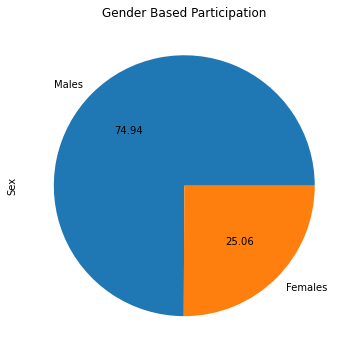

In [126]:
gender_plot = gender['Sex'].value_counts()[:].plot(kind = 'pie', figsize=(6,6), title = 'Gender Based Participation', labels = ['Males','Females'], autopct = '%.2f')


#### We can see in this graph that about one quarter of the participation, from across the times, states that gender disparity is on the higher end in the games. For every 4 players in the games, 1 female participation is noted.

(array([0, 1]), [Text(0, 0, 'Summer'), Text(1, 0, 'Winter')])

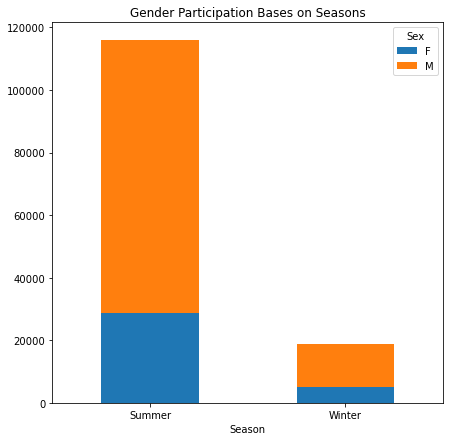

In [128]:
gender.groupby(['Season','Sex']).size().unstack().plot(kind = 'bar', figsize = (6,7), stacked = True, title = 'Gender Participation Bases on Seasons')
plt.xticks(rotation=0)

#### Through this graph, we can reckon that Summer Olympics is more popular than Winter's. However, this graph speaks out clearly that the gender based participation, still remains intact. Participation of female counterpart is quite less to that of male participants.

## Favourable Sport

In [153]:
conn = sql.connect(host = 'localhost', user = 'root', password = 'The28Table', database = 'sportsstats') 

c = conn.cursor(buffered=True)
c.execute('SELECT region, sport, MAX(s_count) AS participations\
                FROM (SELECT DISTINCT n.region, a.sport, COUNT(a.sport) AS s_count\
                            FROM athleteevent a\
                        INNER JOIN noc_region n ON a.noc = n.noc\
                        GROUP BY n.region, a.sport\
                        ORDER BY n.region, s_count DESC\
                      ) AS table1\
            GROUP BY region')
Result1 = c.fetchall()

In [220]:
max_participated_sport_per_country = pd.DataFrame(Result1, columns = ['Country', 'Participation Sport','Participation Count'])
print(max_participated_sport_per_country)

                     Country Participation Sport  Participation Count
0                Afghanistan           Wrestling                   42
1                    Albania       Weightlifting                   17
2                    Algeria           Athletics                  139
3             American Samoa           Athletics                   11
4                    Andorra       Alpine Skiing                  105
..                       ...                 ...                  ...
203  Virgin Islands, British           Athletics                   31
204       Virgin Islands, US            Swimming                   81
205                    Yemen           Athletics                   24
206                   Zambia           Athletics                   70
207                 Zimbabwe           Athletics                   86

[208 rows x 3 columns]


In [154]:
c = conn.cursor(buffered=True)
c.execute('SELECT region, sport, MAX(m_count) AS medals_won\
                FROM (SELECT DISTINCT n.region, a.sport, COUNT(a.medal) AS m_count\
                            FROM athleteevent a\
                        INNER JOIN noc_region n ON a.noc = n.noc\
                        WHERE a.medal IN ("Gold", "Silver", "Bronze")\
                        GROUP BY n.region, a.medal\
                        ORDER BY n.region, m_count DESC\
                      ) AS table2\
            GROUP BY region')
Result2 = c.fetchall()

In [202]:
max_medals_won_sports_per_country = pd.DataFrame(Result2, columns = ['Country', 'Winning Sport','Medals Won'])
print(max_medals_won_sports_per_country)

                Country  Winning Sport  Medals Won
0           Afghanistan      Taekwondo           2
1               Algeria         Boxing           8
2             Argentina         Hockey          92
3               Armenia      Wrestling           9
4             Australia         Hockey         522
..                  ...            ...         ...
131           Venezuela         Boxing          10
132             Vietnam  Weightlifting           3
133  Virgin Islands, US        Sailing           1
134              Zambia      Athletics           1
135            Zimbabwe         Hockey          17

[136 rows x 3 columns]


In [239]:
outcome1 = pd.merge(max_participated_sport_per_country, max_medals_won_sports_per_country, on = 'Country', how = 'outer')
outcome1 = outcome1.set_index(['Country'])

In [241]:
outcome1 = outcome1.fillna({
   'Medals Won':0, 'Winning Sport':'None'
})
outcome1['Medals Won'] = outcome1['Medals Won'].astype(int)

In [242]:
outcome1

,Participation Sport,Participation Count,Winning Sport,Medals Won
Country,,,,
Afghanistan,Wrestling,42,Taekwondo,2
Albania,Weightlifting,17,None,0
Algeria,Athletics,139,Boxing,8
American Samoa,Athletics,11,None,0
Andorra,Alpine Skiing,105,None,0
...,...,...,...,...
"Virgin Islands, British",Athletics,31,None,0
"Virgin Islands, US",Swimming,81,Sailing,1
Yemen,Athletics,24,None,0


In [351]:
outcome1.iloc[25:75, :]

,Participation Sport,Participation Count,Winning Sport,Medals Won
Country,,,,
Botswana,Athletics,74,Athletics,1
Brazil,Athletics,519,Basketball,191
Brunei,Athletics,6,None,0
Bulgaria,Gymnastics,974,Canoeing,144
Burkina Faso,Athletics,26,None,0
Burundi,Athletics,30,Athletics,1
Cambodia,Swimming,23,None,0
Cameroon,Athletics,97,Football,20
Canada,Athletics,1154,Ice Hockey,463


#### This table helps us determine the sport/game where maximum number of players participated from each country throughout history. Next to it is the medals count and the sport for which they won the maximum number of medals, which upon scrutinizing can be seen is not definitely the focus of most of the countries. 

#### For majority of the countries, the correlation between the sport with maximum participation and sport with most medals won cease to exist.  


## Medals Count

### Medals per Country

In [274]:
conn = sql.connect(host = 'localhost', user = 'root', password = 'The28Table', database = 'sportsstats') 

c = conn.cursor(buffered=True)
c.execute('SELECT n.region AS Country,\
                COUNT(a.medal) AS total_count,\
                SUM(CASE\
                        WHEN a.medal = "Gold" THEN 1 ELSE 0\
                    END) AS Gold_medals,\
                SUM(CASE\
                        WHEN a.medal = "Silver" THEN 1 ELSE 0\
                    END) AS Silver_medals,\
                SUM(CASE\
                        WHEN a.medal = "Bronze" THEN 1 ELSE 0\
                    END) AS Bronze_medals\
            FROM athleteevent a\
            RIGHT JOIN noc_region n\
                ON a.noc = n.noc\
            WHERE a.medal <> "None"\
            GROUP BY n.region\
            ORDER BY Country')
Result3 = c.fetchall()

In [275]:
medal_won_by_countries = pd.DataFrame(Result3, columns = ['Country', 'Total Medals', 'Gold', 'Silver', 'Bronze'])
medal_won_by_countries = medal_won_by_countries.set_index(['Country'])
medal_won_by_countries

,Total Medals,Gold,Silver,Bronze
Country,,,,
Afghanistan,2,0,0,2
Algeria,17,5,4,8
Argentina,274,91,92,91
Armenia,16,2,5,9
Australia,1349,368,459,522
...,...,...,...,...
Venezuela,15,2,3,10
Vietnam,4,1,3,0
"Virgin Islands, US",1,0,1,0


In [301]:
c = conn.cursor(buffered=True)
c.execute('SELECT year,\
                SUM(CASE\
                          WHEN medal IN ("Gold", "Silver", "Bronze") THEN 1 ELSE 0\
                    END) AS total_medals,\
                COUNT(DISTINCT sport) AS sports_categories,\
                COUNT(event) AS participation\
            FROM athleteevent\
            GROUP BY year\
            ORDER BY year')
Result4 = c.fetchall()

In [335]:
year_medal_participation = pd.DataFrame(Result4, columns = ["Year", "Medals", "No. Sports Category", "Participation"])
year_medal_participation['Medals'] = year_medal_participation['Medals'].astype(int)
year_medal_participation = year_medal_participation.set_index(['Year'])
year_medal_participation

,Medals,No. Sports Category,Participation
Year,,,
1896,143,9,380
1900,604,20,1936
1904,486,18,1301
1906,458,13,1733
1908,831,24,3101
1912,941,17,4040
1920,1308,25,4292
1924,962,30,5693
1928,823,25,5574


#### This analysis will draw out the medals won on yearly basis with number of participation based on Event/games organized under each category of sport.

<AxesSubplot:xlabel='Year'>

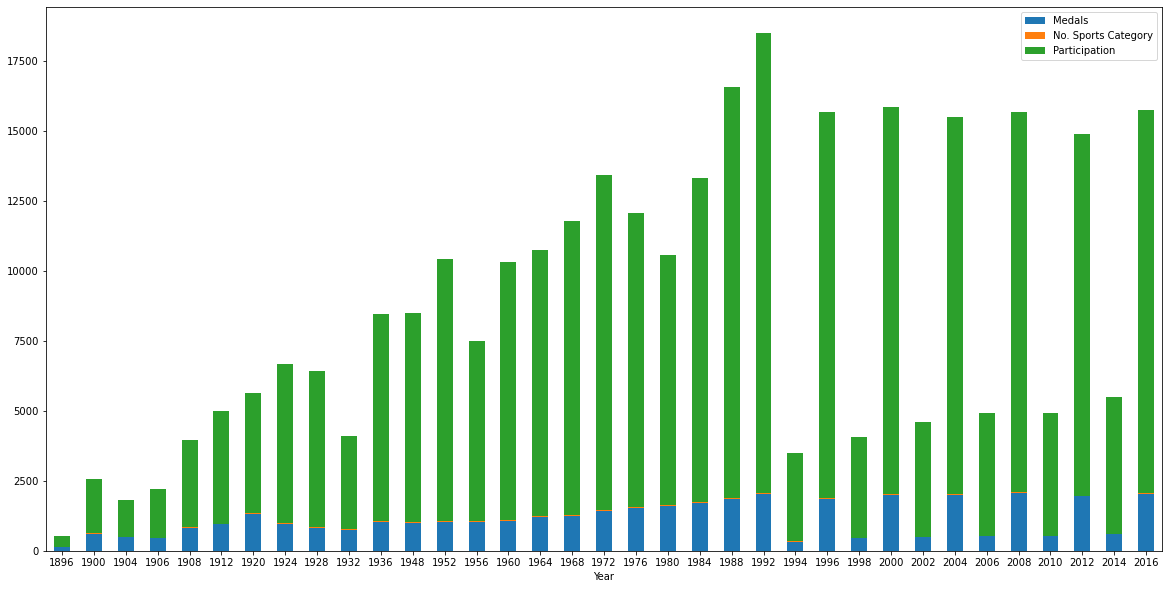

In [343]:
year_medal_participation.plot.bar(stacked = True, figsize = (20,10), rot = 0)

#### This graph represents how the participation has varied through times. There has been a gradual increase in participation of Olympics since the inception of the games, and in the last three decades, we observed the consistency in the number of participants.   

## Submit 2-3 key points you may have discovered about the data, e.g. new relationships? Aha's! Did you come up with additional ideas for other things to review?
- Total number of players in Winters Olympics is less than the total number of female participations noted in overall Summer olympics.
- From table 'year_medal_participation', we observed that number of sports category increased with time and has remained consistent in the past three decades (putting aside the alternate Olympics which corresponds to Winter games).

## Did you prove or disprove any of your initial hypotheses? If so, which one and what do you plan to do next?

- Summer games indeed brought more traction of participants which can be clearly seen in the graph 'Gender participation Based on Seasons'.
- Participation of players indeed increaed with the passing of each year and peaked in 1992, however, post that there has been a dip in the nunmber of participants and it has remained consistent.
- Gender graph has spoken out quite clearly on how much disparity exists between the players corresponding to different gender, with female to male patricipation ration being 1:4.


## What additional questions are you seeking to answer?

-	To find out relation in the events and increase in winning medals 
-   In Winter Olympics, if the number of participants reduces with regards to their country, or the country withdraws their participation entirely.